## Import Libraries

In [1]:
import numpy as np 
import pandas as pd
from sklearn.datasets import load_boston
import warnings

In [2]:
warnings.filterwarnings("ignore")

In [3]:
# Loading boston housing Dataset 

boston = load_boston()

In [4]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [5]:
# let's see the features name
boston["feature_names"]

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [6]:
# Splitting data and target 

X = boston["data"]
y = boston["target"] 

In [7]:
# Creating DataFrame with Feature Names

df = pd.DataFrame(X)
df.columns = boston["feature_names"]
df.shape

(506, 13)

In [8]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [10]:
# let's initialization empty dataFrame for data combination  

df_mix = pd.DataFrame() 

In [11]:
# let's create new features in df_mix by computing interactions between pairs of original features.

for i in df.columns:
    for j in df.columns:
       df_mix[i+"_"+j] = df[i]*df[j] 
       

In [12]:
df_mix

,CRIM_CRIM,CRIM_ZN,CRIM_INDUS,CRIM_CHAS,CRIM_NOX,CRIM_RM,CRIM_AGE,CRIM_DIS,CRIM_RAD,CRIM_TAX,...,LSTAT_CHAS,LSTAT_NOX,LSTAT_RM,LSTAT_AGE,LSTAT_DIS,LSTAT_RAD,LSTAT_TAX,LSTAT_PTRATIO,LSTAT_B,LSTAT_LSTAT
0,0.000040,0.11376,0.014599,0.0,0.003400,0.041554,0.412064,0.025849,0.00632,1.87072,...,0.0,2.67924,32.74350,324.696,20.368200,4.98,1474.08,76.194,1976.5620,24.8004
1,0.000746,0.00000,0.193082,0.0,0.012808,0.175358,2.154759,0.135652,0.05462,6.60902,...,0.0,4.28666,58.68794,721.146,45.399294,18.28,2211.88,162.692,3627.6660,83.5396
2,0.000745,0.00000,0.192940,0.0,0.012799,0.196079,1.667419,0.135552,0.05458,6.60418,...,0.0,1.89007,28.95555,246.233,20.017413,8.06,975.26,71.734,1583.1049,16.2409
3,0.001048,0.00000,0.070567,0.0,0.014825,0.226525,1.482546,0.196233,0.09711,7.18614,...,0.0,1.34652,20.57412,134.652,17.822868,8.82,652.68,54.978,1160.2122,8.6436
4,0.004768,0.00000,0.150529,0.0,0.031625,0.493500,3.742510,0.418595,0.20715,15.32910,...,0.0,2.44114,38.09351,288.886,32.311526,15.99,1183.26,99.671,2115.4770,28.4089
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.003923,0.00000,0.747176,0.0,0.035887,0.412920,4.327733,0.155235,0.06263,17.09799,...,0.0,5.54091,63.75431,668.197,23.968062,9.67,2639.91,203.070,3790.5433,93.5089
502,0.002049,0.00000,0.540071,0.0,0.025940,0.277052,3.472209,0.103555,0.04527,12.35871,...,0.0,5.20284,55.56960,696.436,20.770500,9.08,2478.84,190.680,3603.8520,82.4464
503,0.003692,0.00000,0.724867,0.0,0.034815,0.423862,5.529160,0.131697,0.06076,16.58748,...,0.0,3.23172,39.34464,513.240,12.224700,5.64,1539.72,118.440,2238.5160,31.8096
504,0.012010,0.00000,1.307409,0.0,0.062795,0.744554,9.786387,0.261800,0.10959,29.91807,...,0.0,3.71304,44.02512,578.664,15.480072,6.48,1769.04,136.080,2549.5560,41.9904


In [13]:
# let's see the columns of new combined feature dataframe

print(df_mix.columns)

Index(['CRIM_CRIM', 'CRIM_ZN', 'CRIM_INDUS', 'CRIM_CHAS', 'CRIM_NOX',
       'CRIM_RM', 'CRIM_AGE', 'CRIM_DIS', 'CRIM_RAD', 'CRIM_TAX',
       ...
       'LSTAT_CHAS', 'LSTAT_NOX', 'LSTAT_RM', 'LSTAT_AGE', 'LSTAT_DIS',
       'LSTAT_RAD', 'LSTAT_TAX', 'LSTAT_PTRATIO', 'LSTAT_B', 'LSTAT_LSTAT'],
      dtype='object', length=169)


In [14]:
frames = [df, df_mix]

In [15]:
# Combine the original DataFrame df and the feature-interaction DataFrame df_mix horizontally.

df_df_mix  = pd.concat(frames, axis = 1)

In [16]:

X1 = df_df_mix.values

In [17]:
# split the dataset into training and testing subsets.

from sklearn.model_selection import train_test_split

In [18]:
# Splitting the original data(X) and the augmented data(X1) into training and testing sets for model evaluation.

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.7, random_state=123)
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, y, test_size=0.7, random_state=123)

In [19]:
# Let's normalize the cols

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc_x_train = sc.fit_transform(X_train)
sc_x_test = sc.transform(X_test)
sc_x1_train = sc.fit_transform(X1_train)
sc_x1_test = sc.transform(X1_test)

In [20]:
sc_x1_train.shape, sc_x_train.shape

((151, 182), (151, 13))

In [21]:
# sc_x_train = sc_x_train.reshape(1, -1)
# sc_x1_train = sc_x1_train.reshape(1, -1)

In [22]:
sc_x1_test

array([[ 4.79901457, -0.47720874,  1.10797446, ..., -0.2015808 ,
        -1.74354256, -0.40524478],
       [-0.3157194 , -0.47720874, -0.86547841, ..., -0.77911216,
        -0.71009703, -0.66203291],
       [-0.31787931,  0.34187077, -1.03367866, ..., -1.22761857,
        -1.16067301, -0.78489948],
       ...,
       [-0.3127434 , -0.47720874,  0.34382335, ..., -0.28585965,
        -0.13441732, -0.39118875],
       [-0.30599631,  0.54664064, -0.77267828, ..., -0.67985101,
        -0.66185914, -0.64298562],
       [-0.30741322,  0.42377872, -0.66682812, ..., -0.83529576,
        -0.80126397, -0.69578886]])

#### Linear Regression 

In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
lr = LinearRegression()
lr1 = LinearRegression()

In [25]:
lr.fit(sc_x_train, Y_train)
lr1.fit(sc_x1_train, Y1_train)

LinearRegression()

In [26]:
y_pred = lr.predict(X_test)
train_score = lr.score(sc_x_train, Y_train)
test_score = lr.score(sc_x_test, Y_test)
print("Training Score of original data = ", train_score)
print("Testing Score of original data =", test_score)
print("\n")

y1_pred = lr1.predict(X1_test)
train1_score = lr1.score(sc_x1_train, Y1_train)
test1_score = lr1.score(sc_x1_test, Y1_test)
print("Training Score of augmented data = ", train1_score)
print("Testing Score of augmented data =", test1_score)


Training Score of original data =  0.7268704184537585
Testing Score of original data = 0.7062180675536951


Training Score of augmented data =  0.9681689431915461
Testing Score of augmented data = -0.16251392290716837


In [27]:
import matplotlib.pyplot as plt

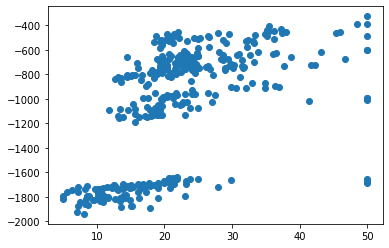

In [28]:
plt.scatter(Y_test, y_pred)

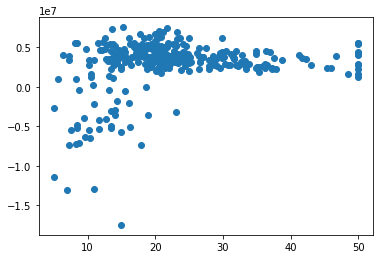

In [29]:
plt.scatter(Y1_test, y1_pred)

**Conclusion:**

Overfitting is seen in the model trained on augmented dataset. While it performs well on the training set, it does poorly on the test set. This emphasizes the significance of finding an appropriate balance between model complexity and generalization. Augmenting characteristics might create noise or capture erroneous associations in new data. Regularization techniques or restricting the complexity of the augmented features could help to reduce overfitting and improve generalization. 